# Time Series Modelling & Stock Forecasting - using Prophet

In [1]:
# installing Prophet using below code:
#conda install -c conda-forge prophet

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [123]:
# Importing and Loading all the necessary libraries:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
from sklearn import metrics

In [2]:
# Importing the data from Kaggle as a csv file and converting it into a Pandas DataFrame:
amazon_data = pd.read_csv('Amazon.csv')

# Viewing the snapshot of first 5 rows of the loaded dataset:
amazon_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


In [3]:
# Converting the dates in index column to DatetimeIndex dtype:
amazon_data.Date = pd.to_datetime(amazon_data.Date)

# adding a Year column to our dataset:
amazon_data['Year'] = pd.DatetimeIndex(amazon_data['Date']).year

In [4]:
# Checking the size of dataset - total rows and columns:
amazon_data.shape

(5852, 8)

In [5]:
# Slicing stock data from 2015 onwards for use in Stock Forecasting:
amazon_df = amazon_data[amazon_data['Year'] >= 2015]
amazon_df.head(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Year
4437,2015-01-02,312.579987,314.750000,306.959991,308.519989,308.519989,2783200,2015
4438,2015-01-05,307.010010,308.380005,300.850006,302.190002,302.190002,2774200,2015
4439,2015-01-06,302.239990,303.000000,292.380005,295.290009,295.290009,3519000,2015
4440,2015-01-07,297.500000,301.279999,295.329987,298.420013,298.420013,2640300,2015


In [6]:
# Resetting index for the sliced dataframe:
amazon_df.reset_index(inplace=True)

# selecting only 2 columns to form the subset data for use in our FB Prophet model:
data=amazon_df[["Date","Adj Close"]]

# Renaming columns of data subset as per the Prophet model requirements:
data.rename(columns={"Date": "ds", "Adj Close": "y"}, inplace=True)

data.head()

,ds,y
0,2015-01-02,308.519989
1,2015-01-05,302.190002
2,2015-01-06,295.290009
3,2015-01-07,298.420013
4,2015-01-08,300.459991


In [8]:
# Splitting the data into training and testing subsets into ratio of 80:20:
df_train=data[0:1132]
df_test=data[1132:]

df_train.shape, df_test.shape

((1132, 2), (283, 2))

In [137]:
# Instantiating Prophet object for creating the Prophet model:
model = Prophet(daily_seasonality=True)  # as error thrown by model asks to specify this parameter

# Fitting the training set to the model:
model.fit(df_train)

#### Making In-sample Forecast for Amazon Stock -  

Predicting on Unseen Data (testing subset)

In [139]:
# Using the Prophet model to make predictions about Testing subset (283 time periods)- 
# making prediction for 283 time periods i.e. testing subset period:
future = pd.DataFrame(df_test.ds)
future.columns = ['ds']
future['ds']= future['ds']

# making prediction for 283 time periods in the testing subset:
forecast = model.predict(future)

# Viewing specific columns of the forecasted data - 
# yhat” indicates the predicted time series data. “yhat_lower” and “yhat_upper” indicate the probable lower and upper limit for predictions:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2019-07-03,1839.630523,1760.637185,1917.059578
1,2019-07-05,1837.693571,1756.520611,1912.250222
2,2019-07-08,1839.896603,1761.665045,1912.855218
3,2019-07-09,1846.477281,1769.357592,1925.084395
4,2019-07-10,1848.206135,1773.647242,1928.012035
...,...,...,...,...
278,2020-08-10,1920.339613,1446.056064,2439.155341
279,2020-08-11,1924.482917,1474.827849,2440.575296
280,2020-08-12,1923.656367,1453.425849,2427.211589
281,2020-08-13,1923.379671,1455.438148,2433.218966


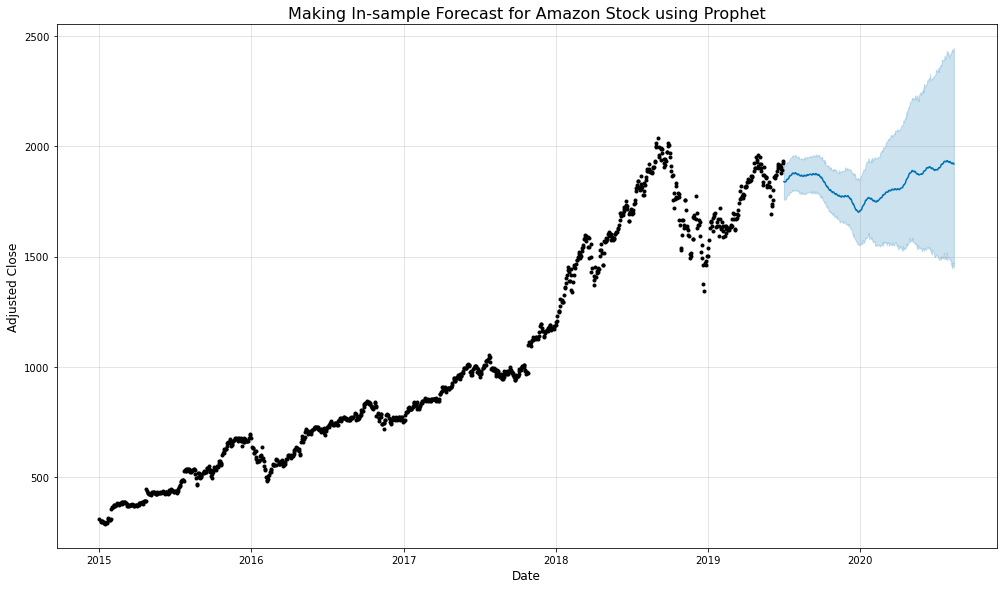

In [140]:
# Plotting the Predictions made by Prophet and the Original data:
model.plot(forecast, figsize=(14,8))
plt.title("Making In-sample Forecast for Amazon Stock using Prophet", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Close", fontsize=12)
plt.show()

In [122]:
# Mean Absolute Percentage Error - 
mape = metrics.mean_absolute_percentage_error(df_test.y, forecast.yhat)
print('MAPE: %.4f' % mape)

MAPE: 0.1271


From the results of 12.7% MAPE, we can imply that Prophet model is about 87.3% accurate in predicting the test set observations.

#### Making Out-of-Sample Forecast for Amazon Stock - 

In [90]:
# Using the Prophet models to make predictions about the next 182 time periods (approx. next 6 months)- 
# Instantiating Prophet object once again for out-of-sample forecasting:
model_future = Prophet(daily_seasonality=True)  # as error thrown by model asks to specify this parameter

# Fitting the entire dataset to the model, by specifying the period for which we want to make predictions:
future_2 = model_future.fit(data).make_future_dataframe(periods=182)

# making prediction for next 6 months into the future:
forecast_2 = model_future.predict(future_2)

# Viewing specific columns of the forecasted data - 
# yhat” indicates the predicted time series data. “yhat_lower” and “yhat_upper” indicate the probable lower and upper limit for predictions:
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1592,2021-02-08,2980.558704,2699.779783,3231.572048
1593,2021-02-09,2989.090140,2710.939303,3260.121653
1594,2021-02-10,2995.476557,2724.595928,3281.701535
1595,2021-02-11,2998.867722,2728.667642,3280.647876
1596,2021-02-12,2998.970378,2709.238489,3277.018149


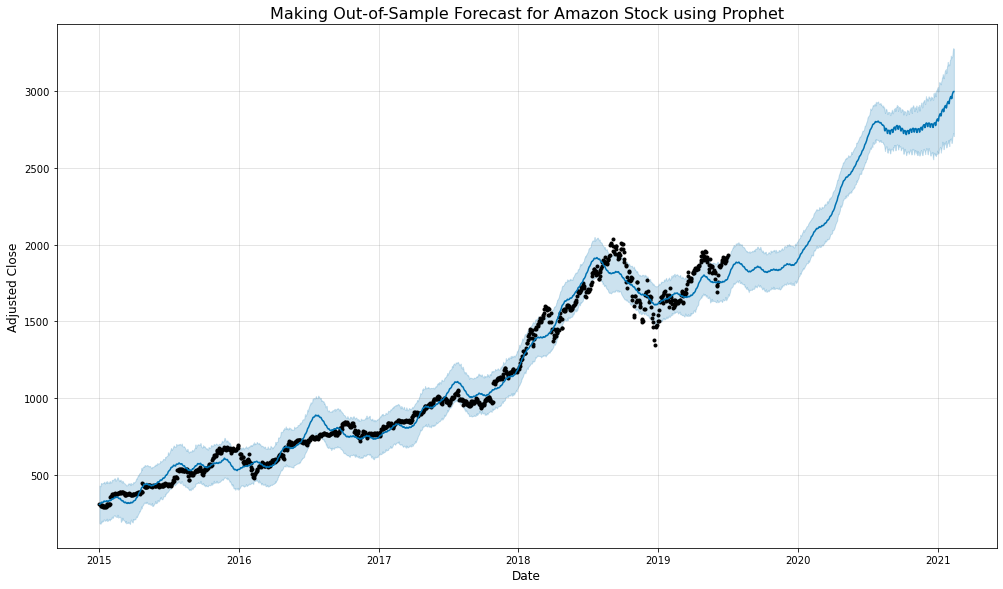

In [142]:
# Plotting the Predictions made by Prophet and the Original data:
model.plot(forecast_2, figsize=(14,8))
plt.title("Making Out-of-Sample Forecast for Amazon Stock using Prophet", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Adjusted Close", fontsize=12)
plt.show()

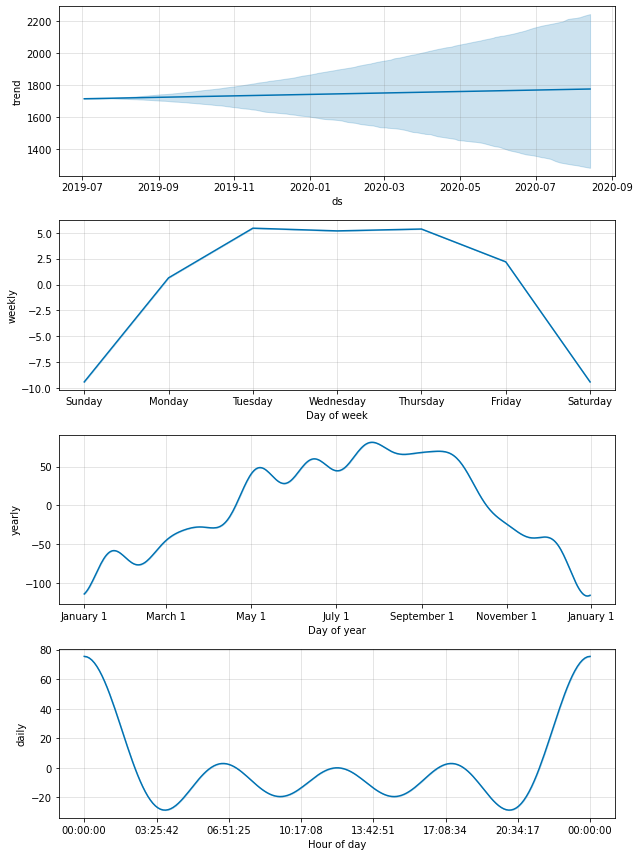

In [92]:
# Plotting the forecasted components from our model:
model.plot_components(forecast)
plt.show()

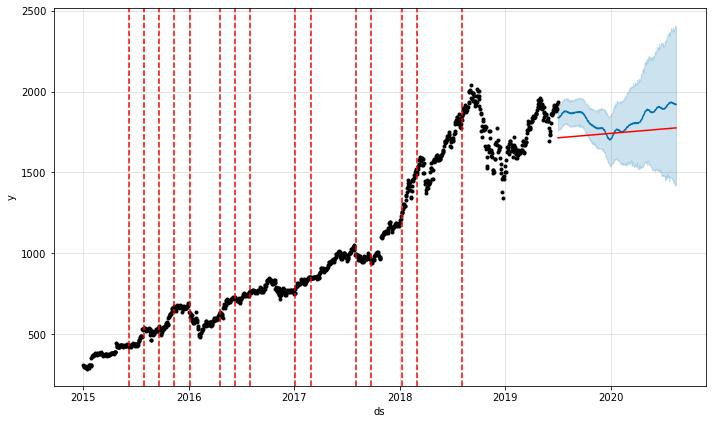

In [93]:
# Adding ChangePoints to Prophet:
# Changepoints are the datetime points where the time series have abrupt changes in the trajectory.
# By default, Prophet adds 25 changepoints to the initial 80% of the data-set.
# Let’s plot the vertical lines where the potential changepoints occurred.

from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)